In [ ]:
#installations for image editing
!pip install opencv-python
!pip install scikit-image

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.morphology import binary_erosion, binary_opening, disk, square

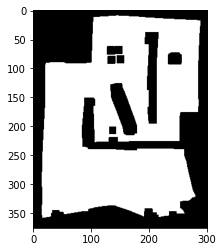

In [9]:

img = cv2.imread('finalMapedited.png', 2)
plt.imshow(img,cmap='gray')
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# converting to its binary form
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#change the image to binary
#255 is where the black areas are. We want to keep that.
cond = bw_img == 255
cond2 = bw_img < 255
bw_img[cond]=1
bw_img[cond2]=0

#create the kernel to perform erosion, number is how big we want the erosion to be
kernel=square(12)
#can use disk too if we want circular erosion. Depends on what is better

#smooth the image
bw_img = binary_opening(bw_img, kernel)

#erode it to make the black areas bigger
bw_img = binary_erosion(bw_img, kernel)

plt.imshow(bw_img,cmap='gray')
plt.show()

new_img=np.zeros(bw_img.shape)
for i in range(bw_img.shape[0]):
    for j in range(bw_img.shape[1]):
        if (bw_img[i][j]==False):
            # 1 is obstacles
            new_img[i][j]=1
        else:
            # 0 is open space
            new_img[i][j]=0

#  save image array to text file
np.savetxt("mapArray.txt", new_img, delimiter =",",fmt='%d')

# CODE BELOW WAS TO CHECK THAT ARRAY WAS POPULATED CORRECTLY
# load image array for use later
# imgArr=[]
# with open("array.txt") as textFile:
#     for line in textFile:
#         lines=line.split(',')
#         imgArr.append(lines)

# imgArr=np.array(imgArr).astype(int)
# plt.imshow(imgArr,cmap='gray')
# plt.show()


In [12]:
print(new_img.shape)
# export edited file
cv2.imwrite("newimg.png", new_img*255)

(376, 301)


True